In [1]:
# Enable module reloading
%load_ext autoreload
%autoreload 2

# Enable interactive plots
%matplotlib notebook

import backstage.plots as plots

# Week 2

__Goals for this week__

We will implement a very simple machine learning (ML) model - a linear regression model. This model is in a way a very rudimentary neural network. We will see the basic properties of this model and we will apply this model on real-life data for house price prediction.

__Concepts for this week__
1. _Linear Regression_ - One of the simplest ML models, a great starting point for deep learning study.
2. _Stochastic Gradient Descent_ - Widely used optimization technique. This technique and its variants are used in majority of deep learning that is done today.
3. _Basic Experimental Setup_ - We will see how to do a basic model evaluation.

__How to solve this lab?__

Just follow this notebook and run all the code. When prompted complete the code in the referenced files. Usually a test is provided so you can verify your programming solution. Correct answers for some exercises are provided at the bottom.

__Feedback__

This lab is a work in progress. If you notice a mistake, notify us or you can even make a pull request. Also please fill the questionnaire after you finish this lab to give us feedback.

## Linear Regression

Regression is one of the basic ML tasks. We wish to predict a continuous value for a sample by using sample features. The regression model is a mapping function $f: \mathbb{R}^M \rightarrow \mathbb{R}$, where $M$ is the dimensionality of the sample, i.e. the number of sample features. E.g. we might use different house features (such as its living area, age, number of bedrooms etc.) for predicting its price on the market. Function $f$ is used to approximate the real data generation process, in this case a market that sets the prices for the houses according to various criteria.

In general, we assume we have a dataset of samples, where each sample $i$ has features $\mathbf{x}^{(i)}$ and a true value of predicted variable $y^{(i)}$. Our goal is to create the function $f$, such as $f(\mathbf{x}^{(i)}) \approx y^{(i)}$ even for samples the model has not seen before.

### Definition of Linear Regression

__Notation Reminder:__ We use bold for vectors. $\mathbf{x}$ is a vector and $x_i$ is the $i$-th component of $\mathbf{x}$.

With linear regression each feature $x_i \in \mathbf{x}$ has a weight $w_i$ assigned. The prediction of linear regression model is then a weighted sum:

$\hat{y} = \sum_{i=1}^{N}{x_i w_i} + b = \mathbf{x}\cdot\mathbf{w} + b$

$\hat{y}$ is the predicted value (we use $y$ for the true value). Unless we have a perfect regression model, these two will always be different. Apart from feature vector $\mathbf{x}$, we also introduced weight vector $\mathbf{w}$ in the equation. Feature vector $\mathbf{x}^{(i)}$ has different values for each sample $i$, while the weight vector $\mathbf{w}$ is the same for all the samples.

Finally, we also introduced additional scalar term $b$, called _bias_ in the equation. This is essentially an additional weight that is not dependent on the value of input vector, but is instead applied for each input. In this model $\mathbf{w}$ and $b$ are considered _parameters_. While $\mathbf{x}$ and $y$ are given from our dataset, parameters $\theta = \{\mathbf{w}, b\}$ are variables whose values we do not know. Instead, their optimal value is approximated from the data by a learning process.

__Exercise 2.1:__ Compare the linear regression model to the models of artificial neurons from the lectures.

### Interactive Example with 1D Input

You can change the parameters $w_1$ and $b$ of the linear regression model for 1D input ($\mathbf{x} \in \mathbb{R}^1$) in the interactive plot below. The model is defined by the following term: $f(x) = w_1x + b$.

__Exercise 2.2:__ Play around with the values of the parameters to see how the model behave. How would you define the family of functions that can be approximated by this model? What will happen to this family when we do not use the bias term in the model?

<IPython.core.display.Javascript object>


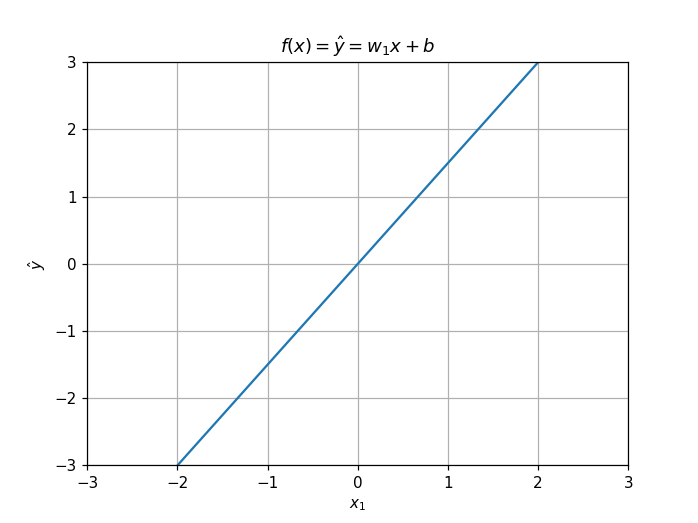

interactive(children=(FloatSlider(value=1.5, description='w1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [15]:
plots.one_d_plot();

### Interactive Example with 2D Input

You can change the parameters for regression model for 2D input ($\mathbf{x} \in \mathbb{R}^2$) in the interactive plot below. This is the same model as before, only now it works in higher dimensional space. The model is defined by: $f(\mathbf{x}) = w_1x_1 + w_2x_2 + b$. Note that you can rotate the 3D visualization.

__Exercise 2.3:__ Play around with the parameter values. Before you try it, guess what happens when you set $w_1 = 0$ or $w_2 = 0$ or both $w_1 = w_2 = 0$? What is your interpretation of the model behavior for these cases?

__Exercise 2.4:__ How would you describe the family of functions that can be approximated by the linear regression model in this case with $\mathbf{x} \in \mathbb{R}^2$? Can you assume what would happen if we would not have a bias term in our definition?

<IPython.core.display.Javascript object>


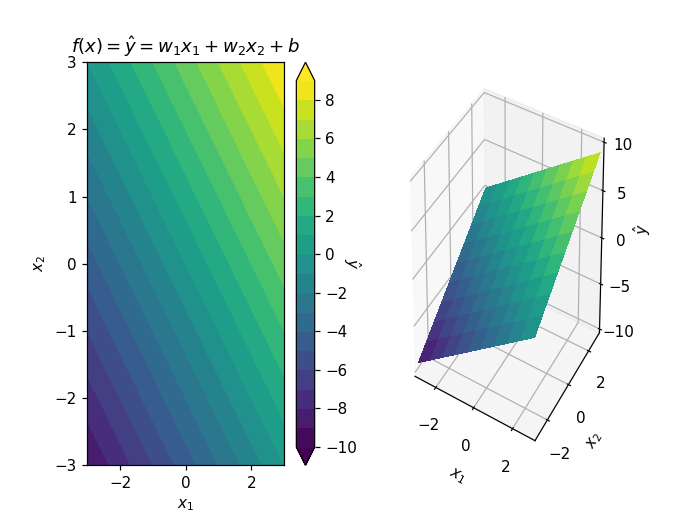

interactive(children=(FloatSlider(value=1.5, description='w1', max=3.0, min=-3.0), FloatSlider(value=1.5, desc…

In [51]:
plots.two_d_plot();

### Fitting the Data

We briefly analyzed what kinds of functions can be approximated by linear regression models. Now we address the issue of how to use these models to fit the data.

__Exercise 2.5:__ Try to find the optimal values of $w_1$ and $b$ to fit the data (red dots).

<IPython.core.display.Javascript object>


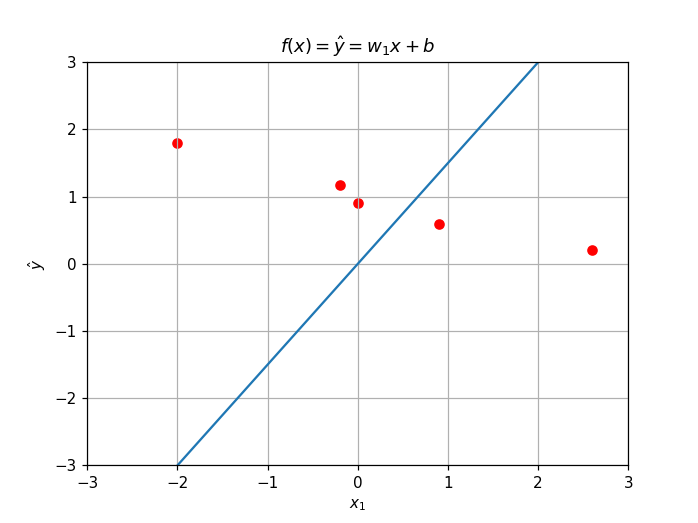

interactive(children=(FloatSlider(value=1.5, description='w1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [52]:
plots.manual_fit_plot();

We can see that the linear model can fit the data quite well, but not perfectly. We are able to obtain perfect fit only rarely, usually when we have artificially generated data. Often the data generating process is more complicated and noisy. Machine learning models are usually approximators, rarely perfect fits.

Notice that it might be hard to decide which parameters are the best, e.g. in our example above, should $w_1$ be equal to $-0.4$ or $-0.3$ with $b = 1$? Both solutions are quite good and it seems hard to decide simply by looking at the graph. The prolem is that so far we use the term _fit the data_ intuitively. To proceed further, we must define a metric that will tell us how well we fit,  i.e. how good our solution is.

### Loss function

The metric used for optimization of models is called loss function (or also _cost function_ ). It is a function that maps the current solution (current parameter values) to a real valued score: $L: \mathbb{R}^{dim(\theta)} \rightarrow \mathbb{R}$. Often we first define the loss function for one sample, e.g. by using the square of the error:

$L^{(i)}(\theta) = (\hat{y}^{(i)} - y^{(i)})^2$

Perfect prediction makes the loss function equal to zero. The worse the prediction, the higher the loss function value is. We are rarely interested in only one sample, usually we want to measure the performance on the whole dataset. Most often we use a mean of individual losses over $K$ samples. This particular loss function is also called mean squared error (MSE):

$L(\theta) = \frac{\sum_{i=1}^K{L^{(i)}(\theta)}}{K} = \frac{\sum_{i=1}^K{(\hat{y}^{(i)} - y^{(i)})^2}}{K}$

Previously we did not have a precise definition of what does it mean to solve a regression task. Now we managed to reframe this question to a optimization problem: We hope that by minimizing the loss function $L$ we manage to find a near optimal regression solution. We minimize the loss function by searching for good values of model parameters $\theta$.

__Exercise 2.6:__ In the interactive plot below we now show the error for each point, as well as the total mean squared error. You can now compare the solutions with $w_1=-0.3, b=1$ and $w_1=-0.4, b=1$. Which one is better? Notice what happens with the error of the middle point when you change the $w_1$ parameter.

<IPython.core.display.Javascript object>


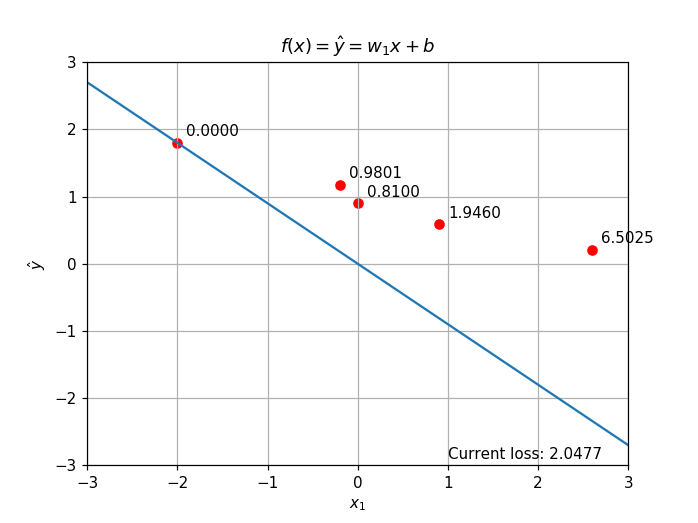

interactive(children=(FloatSlider(value=1.5, description='w1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [13]:
plots.manual_fit_plot(show_loss=True);

__Optional Note:__ You might wonder why we use the square of the error as $L^{(i)}$ and not some other term, e.g. absolute error $|\hat{y}^{(i)} - y^{(i)}|$. In theory, we can use any loss function - and different loss functions might prefer different solutions. E.g. with absolute error $w_1=-0.4$ has a better score than $w_1=-0.3$ with $b=1$ in our example above. Each loss function has different mathematical properties. [This blog by Ben Kuhn](https://www.benkuhn.net/squared) is a nice read about some of the nice properties that MSE has.

## Stochastic Gradient Descent

We have the model defined, as well as its loss function. Now we need to find out how to minimze the loss function by changing the values of parameters $\theta = \{\textbf{w}, b\}$. Gradient descent (GD) is a technique that is based around the idea of calculating derivatives of the loss function $L$ with respect to (w.r.t.) parameters $\theta$: this derivative is marked as $\frac{\delta L}{\delta \theta}$. Derivative of a function tells us the direction of the steepest ascent in the given point. If we move in opposite direction, we should find a point with smaller value.

The arrows in the plot below show _negative_ derivatives $-\frac{\delta f}{\delta x, y}$ in certain points. The direction of each arrow shows us where is the steepest descent in the point and its length shows us how steep it is.

<IPython.core.display.Javascript object>


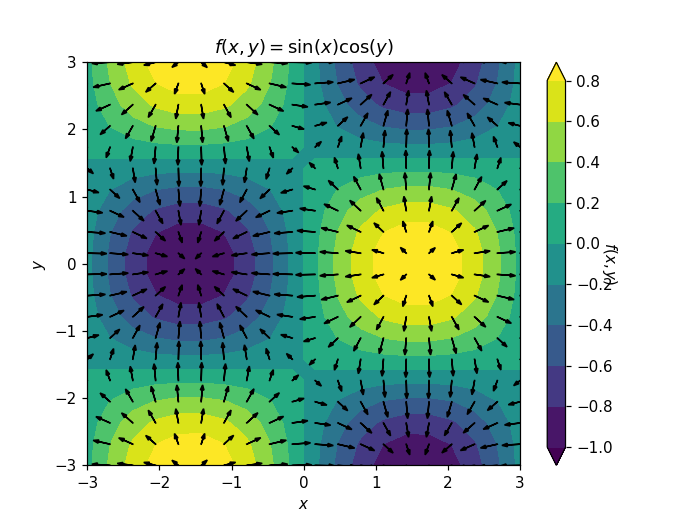

In [8]:
plots.derivatives_plot();

The general idea behind GD is that we can find local minima by following the "arrows", i.e. gradients. Outline of the GD is:

1. __Initialize the parameters to starting values $\theta_0$.__ We will use zero initialization in this lab. Deep neural networks will require more sophisticated algorithms.
2. __Calculate the gradient w.r.t. current parameters $\frac{\delta L}{\delta \theta_i}$.__
3. __Update the parameters with the gradient $\theta_{i+1} = \theta_i - \alpha \frac{\delta L}{\delta \theta_i}$.__ $\alpha$ is called _learning rate_ - it is a constant that is set before the algorithm by us.
4. __If the stopping criterium is not fulfilled, jump to step 2.__ E.g. when certain number of steps was done, when sufficient solution was found or when we detect that further training does not improve the performance anymore.

<IPython.core.display.Javascript object>


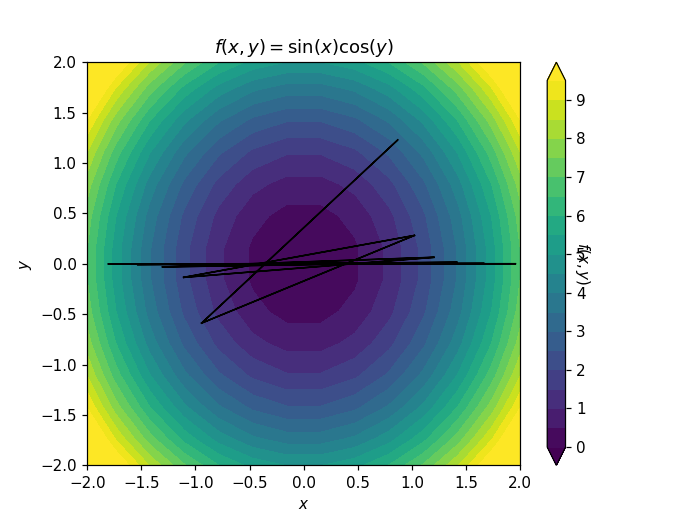

interactive(children=(FloatSlider(value=0.3, description='alpha', max=0.8999999999999999, min=-0.3), Button(de…

In [50]:
import backstage.plots as plots
plots.gd_plot();

In the case of linear regression, calculating the derivative is relatively simple:

dw1 = ...

Observe how does the loss function behave under different learning rates. In practice LR is called a hyperparameter - these are parameters that are not set during the training by the optimization algoritm, but must be set by some other process - often they are set manually. How to fine-tune hyperparameters is still an open research questiona and it is often reduced to trial and error. We fine tune it on log scale, e.g. we usually try values such as 0.1, 0.01, 0.001, very rarely we fine tune it more, e.g. by trying 0.0011, 0.0012 etc. We will discuss hyperparameter tuning in following weeks in more detail.

Training on our toy example

Stochastic:
However note that the complexity is O(M) where M is the number of samples. We calculate the derivatives over a small subset of samples and update the parameters. We repeat this cycle until a stopping criterium is fulfilled - number of steps, epochs, certain performance or no improvement.

__Optional Note:__ Gradient descent is a very general method that can be applied to any differentiable model, i.e. model for which we can calculate $\frac{\delta L}{\delta\theta}$. Most of the deep neural networks we use today come from this family of models. Specialized optimization techniques exist for some simple and well-known models, such as [linear regression](https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods).


Program training on toy example

It is guaranteed to find and optimal solution, hoever it might not be very good - linear models are very limited

Vectorization - bias trick and how does it come together during the derivative.

Adding activation functions...

can we interpret weights? no

## Linear Regression Experiment

Finally, we would like to apply our model to non-toy data. We have a dataset of house pricing from ...
These are the attributes.

First, we need to load the data and then we need to feed it to the model.

train/eval/test

We also with to observe the performance metrics to see how well are we doing - the loss function is defined so that we can learn the data easily, but we might wish to observe other metrics, such as, how many prices were predictes within a certain range or.. The performance metric we are interested in and that we use to compare models might be different that the loss metric we use during the training.

Usually test < eval < train, but it is possible that the split was not perfect, especially for smaller datasets. The test score should be the most accurate compared to real data - unless there is a shift between the data we have and the data we will get.


We can only fit data that come from approximately linear data generation process.
We can say that the expresivity of the model is very limited:
    
interactive: try to fit quadratic function
    
There are ways to go around this limitation: e.g. by feature engineering and basis functions
    We will not adress these techniques in this course

## Correct Answers

__E2.1:__ Artificial neuron is usually defined as $\sigma(\textbf{w}\cdot\textbf{x} + b)$. Compared to linear regression there is an additional activation function $\sigma$. We can say that linear regression is a special case of artificial neuron with identity function used for activation $\sigma(x) = x$.

__E2.2:__ All linear functions of one variable are the family for linear regression. This is not surprising as the definition is the same as the definition for general linear function $f(x) = ax + b$. This inludes all non-vertical lines in the 2D space. With no bias term, we have the family limited only to linear functions that cross the origin $\textbf{O} = [0, 0]$.

__E2.4:__ All linear functions of two variables are the family here. This includes all the non-vertical planes in the 3D space. Again, with no bias term, all the planes would have to cross the origin point. With bias term we can shift the function surface up or down along the $\hat{y}$ axis.